# Import des librairies

In [1]:
import numpy as np
import pandas as pd
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots

pio.renderers.default = "svg"
pd.options.display.max_columns = None
pd.set_option('display.max_rows', None)

# Chargement des données

In [2]:
speed = pd.read_csv("src/Speed+Dating+Data.csv", encoding='latin-1')
speed.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

# Exploration de bases

In [3]:
# taille du dataset
speed.shape

(8378, 195)

In [4]:
# informations générales
speed.info(max_cols=195)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 195 columns):
 #    Column    Non-Null Count  Dtype  
---   ------    --------------  -----  
 0    iid       8378 non-null   int64  
 1    id        8377 non-null   float64
 2    gender    8378 non-null   int64  
 3    idg       8378 non-null   int64  
 4    condtn    8378 non-null   int64  
 5    wave      8378 non-null   int64  
 6    round     8378 non-null   int64  
 7    position  8378 non-null   int64  
 8    positin1  6532 non-null   float64
 9    order     8378 non-null   int64  
 10   partner   8378 non-null   int64  
 11   pid       8368 non-null   float64
 12   match     8378 non-null   int64  
 13   int_corr  8220 non-null   float64
 14   samerace  8378 non-null   int64  
 15   age_o     8274 non-null   float64
 16   race_o    8305 non-null   float64
 17   pf_o_att  8289 non-null   float64
 18   pf_o_sin  8289 non-null   float64
 19   pf_o_int  8289 non-null   float64
 20   pf_o_f

In [5]:
# statistiques de base
speed.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
iid,8378.0,NaN,NaN,NaN,283.675937,158.583367,1.0,154.0,281.0,407.0,552.0
id,8377.0,NaN,NaN,NaN,8.960248,5.491329,1.0,4.0,8.0,13.0,22.0
gender,8378.0,NaN,NaN,NaN,0.500597,0.500029,0.0,0.0,1.0,1.0,1.0
idg,8378.0,NaN,NaN,NaN,17.327166,10.940735,1.0,8.0,16.0,26.0,44.0
condtn,8378.0,NaN,NaN,NaN,1.828837,0.376673,1.0,2.0,2.0,2.0,2.0
wave,8378.0,NaN,NaN,NaN,11.350919,5.995903,1.0,7.0,11.0,15.0,21.0
round,8378.0,NaN,NaN,NaN,16.872046,4.358458,5.0,14.0,18.0,20.0,22.0
position,8378.0,NaN,NaN,NaN,9.042731,5.514939,1.0,4.0,8.0,13.0,22.0
positin1,6532.0,NaN,NaN,NaN,9.295775,5.650199,1.0,4.0,9.0,14.0,22.0
order,8378.0,NaN,NaN,NaN,8.927668,5.477009,1.0,4.0,8.0,13.0,22.0


In [6]:
# Valeurs manquantes
speed.isna().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1846
order          0
partner        0
pid           10
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
like_o       250
prob_o       318
met_o        385
age           95
field         63
field_cd      82
undergra    3464
mn_sat      5245
tuition     4795
race          63
imprace       79
imprelig      79
from          79
zipcode     1064
income      4099
goal          79
date          97
go_out        79
career        89
career_c     138
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      

In [7]:
# Pourcentage de valeurs manquantes
(100 * speed.isnull().sum() / speed.shape[0]).sort_values(ascending=False)

num_in_3    92.026737
numdat_3    82.143710
expnum      78.515159
sinc7_2     76.665075
amb7_2      76.665075
shar7_2     76.438291
attr7_2     76.318931
intel7_2    76.318931
fun7_2      76.318931
amb5_3      75.936978
attr7_3     75.936978
sinc7_3     75.936978
intel7_3    75.936978
fun7_3      75.936978
amb7_3      75.936978
shar7_3     75.936978
shar2_3     75.936978
attr5_3     75.936978
sinc5_3     75.936978
intel5_3    75.936978
fun5_3      75.936978
attr4_3     64.681308
sinc4_3     64.681308
intel4_3    64.681308
fun4_3      64.681308
amb4_3      64.681308
shar4_3     64.681308
attr2_3     64.681308
sinc2_3     64.681308
fun2_3      64.681308
intel2_3    64.681308
amb2_3      64.681308
mn_sat      62.604440
tuition     57.233230
you_call    52.566245
shar1_3     52.566245
date_3      52.566245
attr1_3     52.566245
sinc1_3     52.566245
intel1_3    52.566245
fun1_3      52.566245
amb1_3      52.566245
attr3_3     52.566245
sinc3_3     52.566245
intel3_3    52.566245
fun3_3    

In [8]:
# doublons
speed.duplicated().sum()

np.int64(0)

# Préparation

In [9]:
speed['gender'] = speed['gender'].map({0: 'Femme', 1:'Homme'})

In [10]:
speed['goal'] = speed['goal'].map({1: 'Seemed like a fun night out',
                                   2: 'To meet new people',
                                   3: 'To get a date',
                                   4: 'Looking for a serious relationship',
                                   5: 'To say I did it',
                                   6: 'Other',
                                   np.nan : 'No goal'})

# Qui sont les participants ?

In [11]:
# Nombre de rencontres
speed.shape[0] / 2

4189.0

In [12]:
# Nombre de participants
speed['iid'].nunique()

551

In [13]:
# Nombre de match
speed['match'].value_counts()/2

match
0    3499.0
1     690.0
Name: count, dtype: float64

In [14]:
# Pourcentage de match
speed['match'].value_counts(normalize=True).reset_index()

,match,proportion
0,0,0.835283
1,1,0.164717


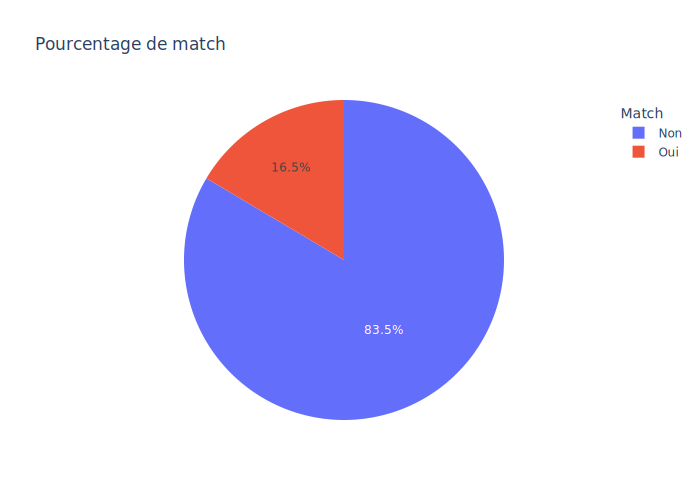

In [15]:
speed['match_cat'] = speed['match'].map({0: 'Non', 1:'Oui'})
fig = px.pie(speed['match_cat'].value_counts(normalize=True).reset_index(), 
             'match_cat',
             'proportion',
             title="Pourcentage de match"
             )
fig.update_layout(
    legend_title="Match"
)
fig.show()

In [16]:
participants = speed.drop_duplicates(subset='iid', keep='first').copy()
participants.shape

(551, 196)

,gender,count
0,Homme,277
1,Femme,274


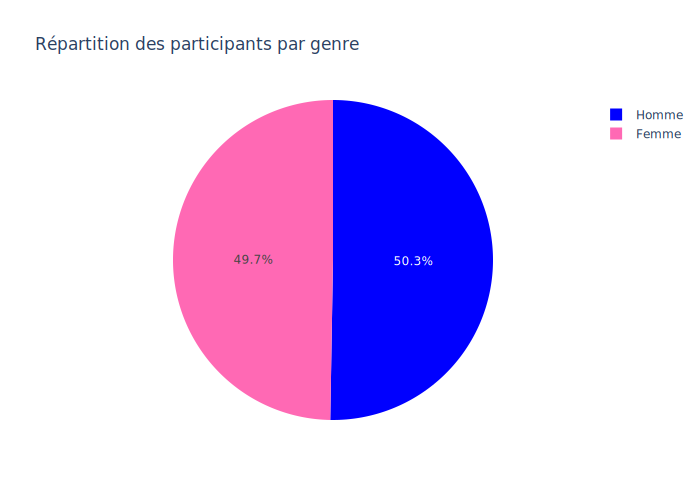

In [17]:
# Sexe des participants 
count_gender = participants['gender'].value_counts().reset_index()
display(count_gender)

fig = px.pie(count_gender, names='gender', values='count',
             color='gender',
             color_discrete_map={'Homme': 'blue', 'Femme': 'hotpink'},
             title="Répartition des participants par genre"
             )
fig.show()

count    543.000000
mean      26.359116
std        3.766960
min       18.000000
25%       24.000000
50%       26.000000
75%       28.000000
max       55.000000
Name: age, dtype: float64

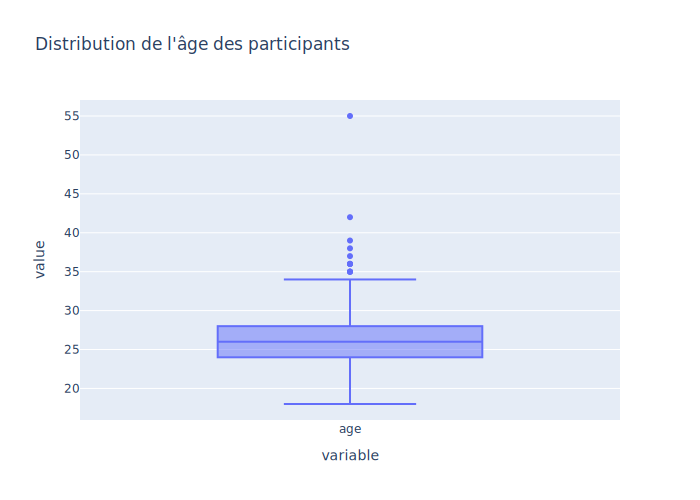

In [18]:
# Age des participants
display(participants['age'].describe())

fig = px.box(participants['age'],
             title='Distribution de l\'âge des participants')
fig.show()

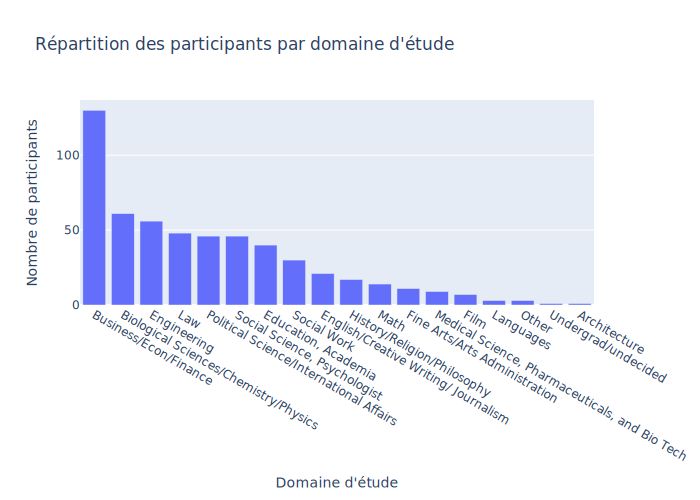

In [19]:
# Domaine d'étude
participants['field_cd'] = participants['field_cd'].map({1:'Law', 
                                                         2:'Math',
                                                         3: 'Social Science, Psychologist',
                                                         4: 'Medical Science, Pharmaceuticals, and Bio Tech',
                                                         5: 'Engineering',
                                                         6: 'English/Creative Writing/ Journalism',
                                                         7: 'History/Religion/Philosophy',
                                                         8: 'Business/Econ/Finance',
                                                         9: 'Education, Academia',
                                                         10: 'Biological Sciences/Chemistry/Physics',
                                                         11: 'Social Work',
                                                         12: 'Undergrad/undecided',
                                                         13: 'Political Science/International Affairs',
                                                         14: 'Film',
                                                         15: 'Fine Arts/Arts Administration',
                                                         16: 'Languages',
                                                         17: 'Architecture',
                                                         18: 'Other' })

counts_field = participants['field_cd'].value_counts().sort_values(ascending=False).reset_index()

fig = px.bar(counts_field, x='field_cd', y='count',
             labels={'field_cd': 'Domaine d\'étude', 'count': 'Nombre de participants'},
             title='Répartition des participants par domaine d\'étude')
fig.show()

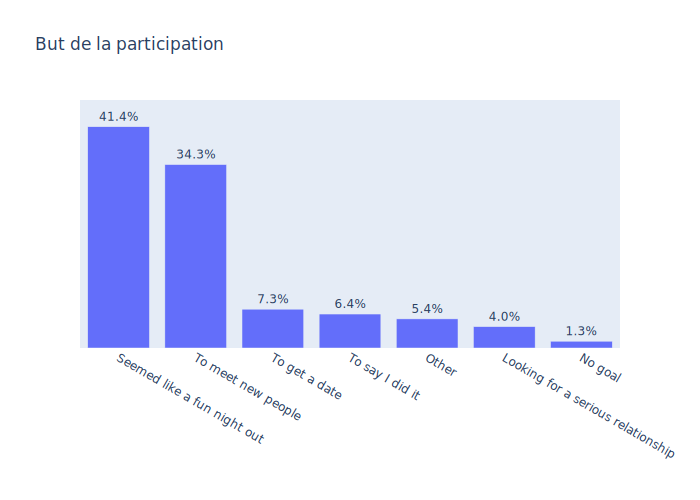

In [20]:
# but
counts_goal = participants['goal'].value_counts(normalize=True).sort_values(ascending=False).reset_index()
counts_goal['Pourcentage'] = (counts_goal['proportion'] * 100).round(1).astype(str) + '%'

fig = px.bar(
    counts_goal,
    x='goal',
    y='proportion',
    labels={'goal': ''},
    title='But de la participation'
)

fig.update_traces(text=counts_goal['Pourcentage'], textposition='outside')
fig.update_yaxes(visible=False, showticklabels=False,
                 range=[0, counts_goal['proportion'].max() + 0.05])
fig.show()


# Pourquoi les gens acceptent un deuxième rendez-vous

In [21]:
# vérification que les attributs des participants des vagues 6 à 9 sont à la même échelle que les autres
participants.loc[participants['wave'].between(6,9, inclusive='both'), 
                 ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].describe()

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,16.188614,17.971287,18.873762,17.875941,14.726238,14.365941
std,3.539942,2.739375,1.996339,2.361175,4.130033,3.894198
min,6.670000,5.130000,14.710000,12.500000,2.330000,2.270000
25%,14.550000,16.670000,17.310000,16.670000,13.040000,12.500000
50%,16.000000,17.950000,18.750000,17.780000,15.560000,15.090000
75%,18.180000,19.570000,20.000000,19.230000,17.780000,16.670000
max,27.780000,23.810000,23.810000,27.780000,20.590000,23.810000


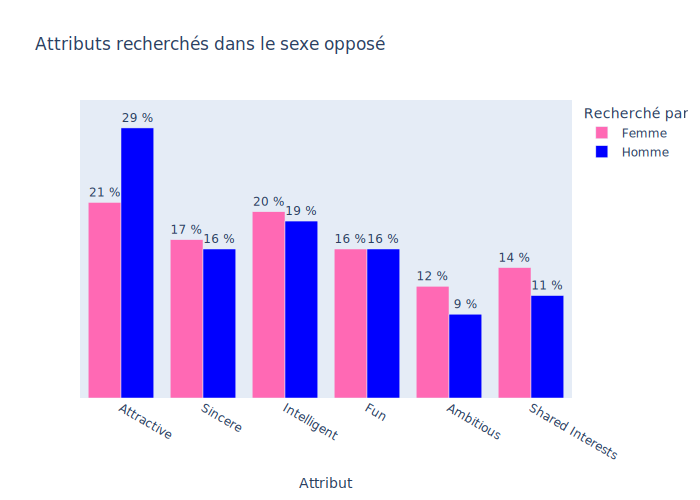

In [35]:
# Attributs recherchés dans le sexe opposé
search = participants.groupby('gender')[['attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3', 'shar1_3']].mean().reset_index().round()
search.columns = ['gender', 'Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious', 'Shared Interests']
search = search.melt(id_vars='gender', var_name='attribute', value_name='importance')
search['importance_text'] = search['importance'].astype(int).astype(str) + ' %'

fig = px.bar(search, 
             x='attribute',
             y='importance',
             color='gender',
             barmode='group',
             color_discrete_map={'Homme': 'blue', 'Femme': 'hotpink'},
             text='importance_text',
             title="Attributs recherchés dans le sexe opposé",
             )
fig.update_layout(
    xaxis_title="Attribut",
    legend_title="Recherché par"
)

fig.update_traces(textposition='outside')
fig.update_yaxes(visible=False, showticklabels=False,
                 range=[0, search['importance'].max() + 3])
fig.update_xaxes(tickangle=30)
fig.show()

In [23]:
# vérification que les attributs des participants des vagues 6 à 9 sont à la même échelle que les autres
participants.loc[participants['wave'].between(6,9, inclusive='both'), 
                 ['attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3', 'shar1_3']].describe()

,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,16.514839,17.782097,18.345968,17.041290,15.470000,14.850161
std,2.784738,2.085182,1.664954,2.502818,2.936622,2.866638
min,9.520000,14.580000,15.000000,7.500000,6.980000,4.650000
25%,15.220000,16.330000,16.757500,16.055000,14.072500,13.950000
50%,16.330000,17.445000,18.370000,17.350000,15.910000,15.380000
75%,17.747500,19.005000,19.555000,18.520000,17.390000,16.670000
max,25.000000,22.730000,22.500000,20.930000,22.500000,20.000000


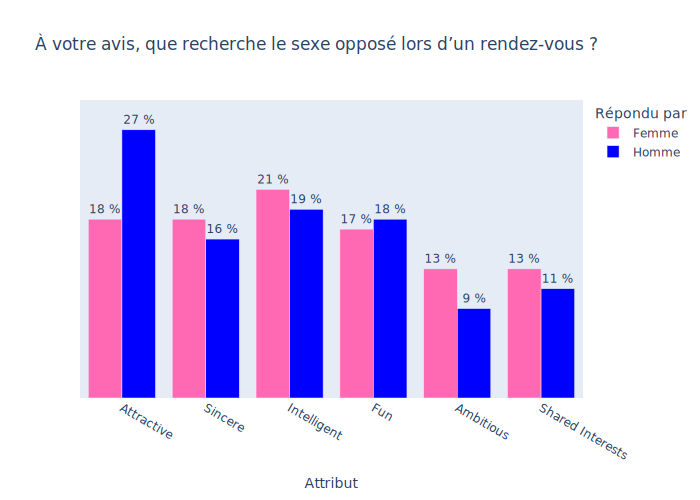

In [36]:
# À votre avis, que recherche le sexe opposé lors d’un rendez-vous ?
search_opposite  = participants.groupby('gender')[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].mean().reset_index().round()
search_opposite.columns = ['gender', 'Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious', 'Shared Interests']
search_opposite = search_opposite.melt(id_vars='gender', var_name='attribute', value_name='importance')
search_opposite['importance_text'] = search_opposite['importance'].astype(int).astype(str) + ' %'

fig = px.bar(search_opposite, 
             x='attribute',
             y='importance',
             color='gender',
             color_discrete_map={'Homme': 'blue', 'Femme': 'hotpink'},
             barmode='group',
             text='importance_text',
             title = "À votre avis, que recherche le sexe opposé lors d’un rendez-vous ?"
             )
fig.update_layout(
    xaxis_title="Attribut",
    legend_title="Répondu par"
)
fig.update_traces(textposition='outside')
fig.update_yaxes(visible=False, showticklabels=False,
                 range=[0, search['importance'].max()+1])
fig.update_xaxes(tickangle=30)
fig.show()

In [25]:
# Nombre de match en fonction du but
speed.groupby('goal')['match'].sum()

goal
Looking for a serious relationship     51
No goal                                15
Other                                  62
Seemed like a fun night out           583
To get a date                         100
To meet new people                    484
To say I did it                        85
Name: match, dtype: int64

In [37]:
# Taux de décisions positives en fonction du goal
dec_goal = (speed.groupby('goal')['dec'].mean() * 100).round(1).reset_index()
dec_goal

,goal,dec
0,Looking for a serious relationship,52.2
1,No goal,29.1
2,Other,39.6
3,Seemed like a fun night out,41.2
4,To get a date,45.0
5,To meet new people,42.8
6,To say I did it,36.9


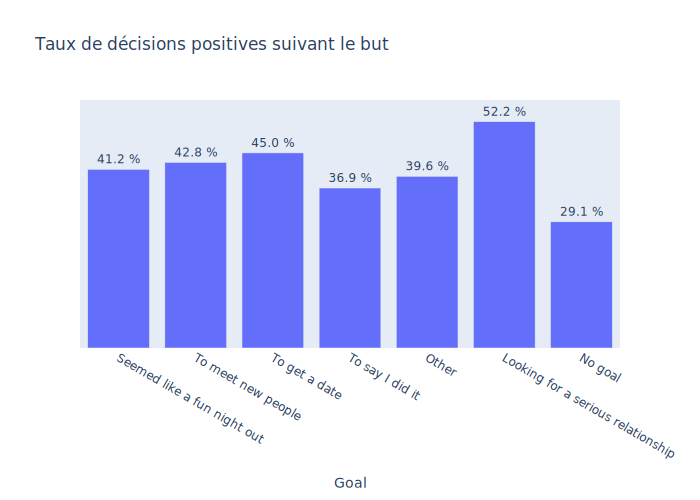

In [42]:
# Décision en fonction du goal

dec_goal['dec_text'] = dec_goal['dec'].astype(str) + ' %'
order = ['Seemed like a fun night out', 'To meet new people','To get a date', 'To say I did it', 
         'Other','Looking for a serious relationship', 'No goal']

fig = px.bar(dec_goal, 
             x='goal',
             y='dec',
             text='dec_text',
             title = "Taux de décisions positives suivant le but",
             category_orders={'goal': order}
             )
fig.update_layout(xaxis_title="Goal")
fig.update_traces(textposition='outside')
fig.update_yaxes(visible=False, showticklabels=False,
                 range=[0, dec_goal['dec'].max()+5])
fig.update_xaxes(tickangle=30)
fig.show()

In [26]:
# Taux de match positif en fonction du goal
match_goal = (speed.groupby('goal')['match'].mean() * 100).round(1).reset_index()
match_goal

,goal,match
0,Looking for a serious relationship,16.9
1,No goal,19.0
2,Other,14.8
3,Seemed like a fun night out,17.0
4,To get a date,15.8
5,To meet new people,16.1
6,To say I did it,16.7


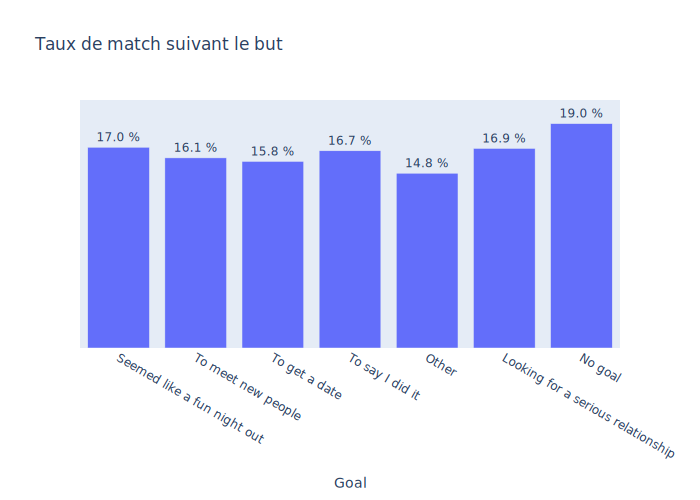

In [27]:
# Match en fonction du goal

match_goal['match_text'] = match_goal['match'].astype(str) + ' %'
order = ['Seemed like a fun night out', 'To meet new people','To get a date', 'To say I did it', 
         'Other','Looking for a serious relationship', 'No goal']

fig = px.bar(match_goal, 
             x='goal',
             y='match',
             text='match_text',
             title = "Taux de match suivant le but",
             category_orders={'goal': order}
             )
fig.update_layout(xaxis_title="Goal")
fig.update_traces(textposition='outside')
fig.update_yaxes(visible=False, showticklabels=False,
                 range=[0, match_goal['match'].max()+2])
fig.update_xaxes(tickangle=30)
fig.show()

,count,mean,std,min,25%,50%,75%,max
match_cat,,,,,,,,
Non,6870.0,0.191822,0.302702,-0.73,-0.02,0.21,0.43,0.91
Oui,1350.0,0.217319,0.306995,-0.83,0.00,0.25,0.46,0.81


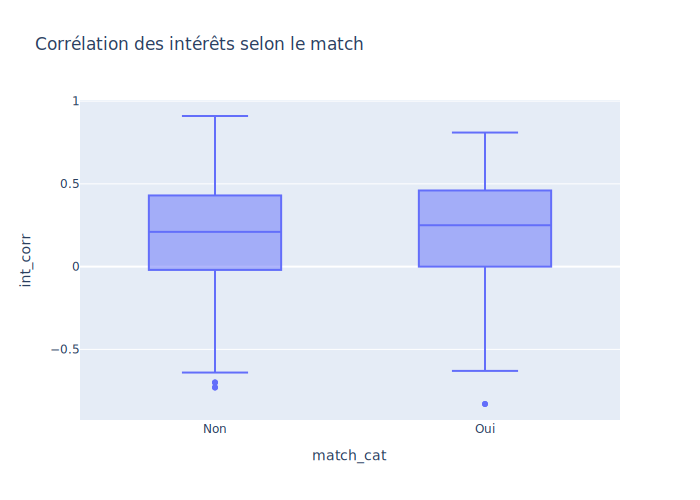

In [28]:
# Lien entre corrélation entre les évaluations des intérêts des participants et des partenaires au cours de la période 1 et match
display(speed.groupby('match_cat')['int_corr'].describe())

fig = px.box(speed, y='int_corr', x='match_cat',
             title='Corrélation des intérêts selon le match')
fig.show()


,count,mean,std,min,25%,50%,75%,max
dec,,,,,,,,
0,4669.0,5.367316,1.821075,0.0,4.0,5.0,7.0,10.0
1,3507.0,7.285258,1.533361,1.0,6.0,7.0,8.0,10.0


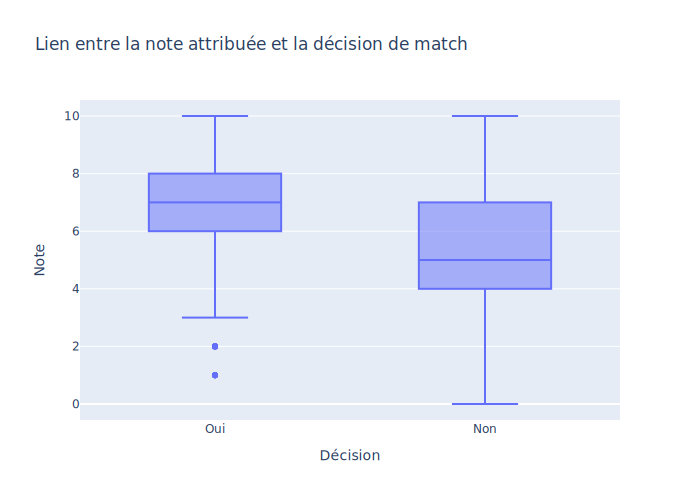

In [29]:
# Lien entre note attribué et décision
display(speed.groupby('dec')['attr'].describe())

speed['dec_cat'] = speed['dec'].map({0: 'Non', 1:'Oui'})

fig = px.box(speed, y='attr', x='dec_cat', 
             title='Lien entre la note attribuée et la décision de match')
fig.update_layout(xaxis_title="Décision",
                  yaxis_title="Note")
fig.show()

In [30]:
# Taux de décision positive du participant
speed['dec'].mean()

np.float64(0.41990928622582957)

,gender,dec
0,Femme,36.5
1,Homme,47.4


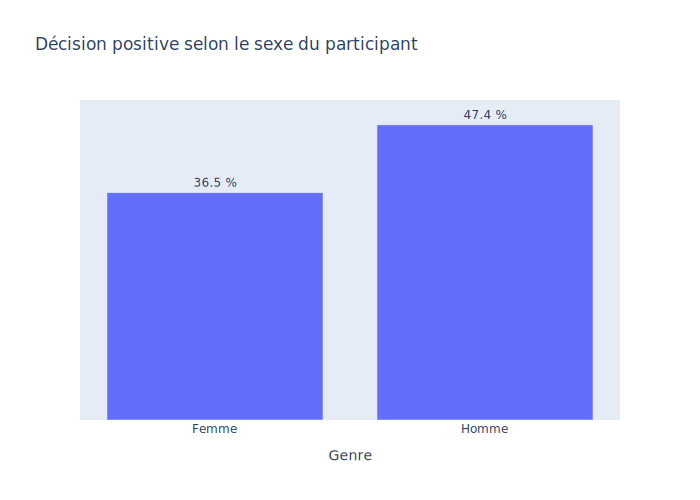

In [31]:
# Décision selon sexe du participant
dec_by_gender = speed.groupby('gender')['dec'].mean().mul(100).round(1).reset_index()
display(dec_by_gender)
dec_by_gender['dec_text'] = dec_by_gender['dec'].astype(str) + ' %'

fig = px.bar(dec_by_gender,
             x='gender',
             y='dec',
             text='dec_text',
             title='Décision positive selon le sexe du participant')
fig.update_layout(xaxis_title="Genre")
fig.update_traces(textposition='outside')
fig.update_yaxes(visible=False, showticklabels=False,
                 range=[0, dec_by_gender['dec'].max()+4])
fig.show()


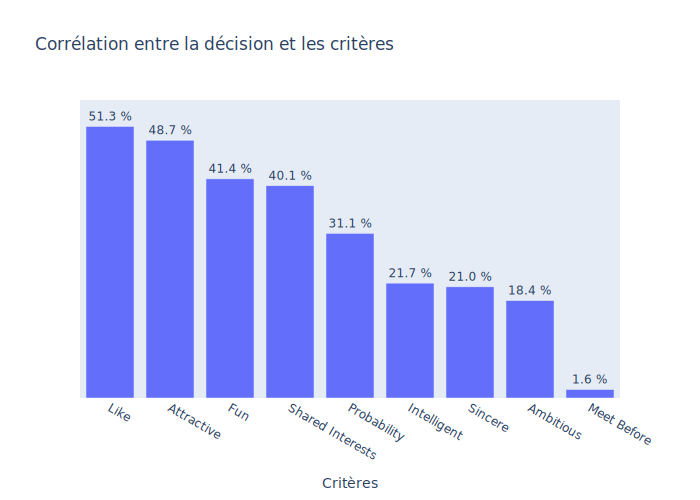

In [32]:
# Corrélations entre dec et critères
corr_vars = ['dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar','like', 'prob', 'met']
corr_matrix = speed[corr_vars].corr().round(3)
dec_corr = corr_matrix.loc['dec'].drop('dec')
dec_corr.index = ['Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious', 'Shared Interests', 'Like', 'Probability', 'Meet Before']
dec_corr = dec_corr.sort_values(ascending=False).reset_index()
dec_corr.columns = ['critere', 'correlation']
dec_corr['cor_text'] = dec_corr['correlation'].mul(100).round(1).astype('str') + " %"

fig = px.bar(dec_corr, 
             x='critere', 
             y='correlation',
             text='cor_text',
             title = "Corrélation entre la décision et les critères",
             )
fig.update_traces(textposition='outside')
fig.update_layout(xaxis_title="Critères")
fig.update_yaxes(visible=False, showticklabels=False,
                 range=[0, dec_corr['correlation'].max()+0.05])
fig.show()

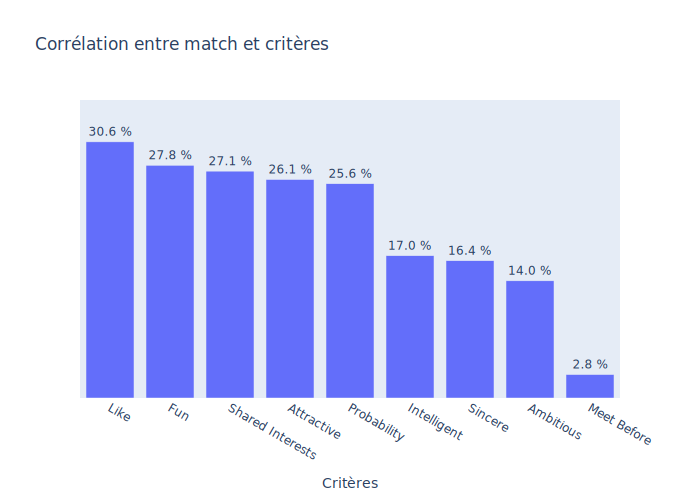

In [33]:
# Corrélations entre match et critères
corr_vars = ['match', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar','like', 'prob', 'met']
corr_matrix = speed[corr_vars].corr().round(3)
dec_corr = corr_matrix.loc['match'].drop('match')
dec_corr.index = ['Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious', 'Shared Interests', 'Like', 'Probability', 'Meet Before']
dec_corr = dec_corr.sort_values(ascending=False).reset_index()
dec_corr.columns = ['critere', 'correlation']
dec_corr['cor_text'] = dec_corr['correlation'].mul(100).round(1).astype('str') + " %"

fig = px.bar(dec_corr, 
             x='critere', 
             y='correlation',
             text='cor_text',
             title = "Corrélation entre match et critères",
             )
fig.update_traces(textposition='outside')
fig.update_layout(xaxis_title="Critères")
fig.update_yaxes(visible=False, showticklabels=False,
                 range=[0, dec_corr['correlation'].max()+0.05])
fig.show()